<a href="https://colab.research.google.com/github/DiegoOCruz/Artificial-Projeto-de-bloco/blob/main/TP3_PB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

       0       1       2       3       4       5       6       7       8   \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

       9   ...      51      52      53      54      55      56      57  \
0  0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   

       58      59  60  
0  0.0090  0.0032   R  
1  0.0052  0.0044   R  
2  0.0095  0.0078   

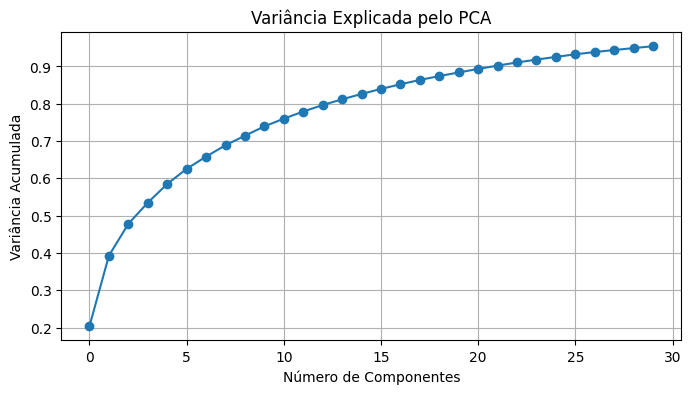

Melhores parâmetros: {'max_depth': 3, 'min_samples_leaf': 6}
Acurácia média (CV): 0.7529
Acurácia: 0.7381
Precisão: 0.5926
Recall: 1.0000
F1-score: 0.7442
AUC-ROC: 0.8858
Especificidade: 0.5769


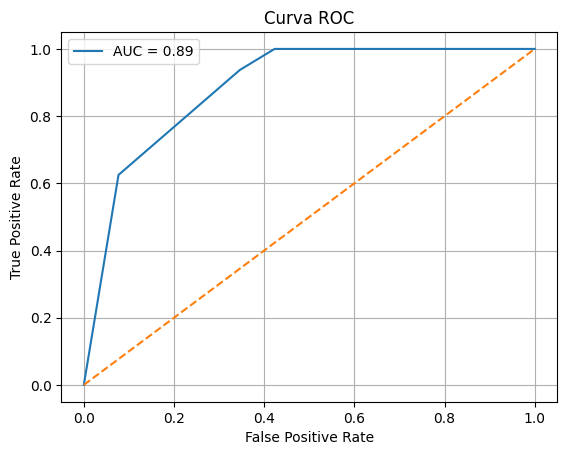

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (confusion_matrix, classification_report, roc_auc_score,
                             roc_curve, accuracy_score, precision_score, recall_score, f1_score)
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/professortiagoinfnet/inteligencia_artificial/refs/heads/main/sonar_dataset.csv"
df = pd.read_csv(url, header=None)

print(df.head())

print("------------------------------------------------------")

# Separando features e rótulos
X = df.iloc[:, :-1]  # menos a ultima coluna
y = df.iloc[:, -1]   # última coluna (Label: R ou M)

# Codificando os rótulos para 0 e 1
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Padronização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# QUESTÃO 1: APLICAÇÃO DE PCA PARA REDUÇÃO DE DIMENSIONALIDADE

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Visualização da variância explicada Q1
plt.figure(figsize=(8,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Acumulada')
plt.title('Variância Explicada pelo PCA')
plt.grid(True)
plt.show()

# QUESTÃO 2: TREINAMENTO DO MODELO COM GRIDSEARCH

X_train, X_test, y_train, y_test = train_test_split(X_pca, y_encoded, test_size=0.2, random_state=42)

param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, None],  # Exploração de hiperparâmetros
    'min_samples_leaf': [1, 2, 4, 6, 8]     # Parâmetros de poda
}

clf = DecisionTreeClassifier(random_state=42, class_weight='balanced')
grid = GridSearchCV(clf, param_grid, cv=5)  # Validação cruzada Q4
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print("Melhores parâmetros:", grid.best_params_)


# QUESTÃO 3

scores = cross_val_score(best_model, X_train, y_train, cv=5)  # Q4 validação cruzada
print(f"Acurácia média (CV): {scores.mean():.4f}")

# QUESTÃO 4: AVALIAÇÃO DO MODELO (MÉTRICAS E CURVA ROC)

y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:,1]

# Métricas Q4 e Q6
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)       # Precisão
rec = recall_score(y_test, y_pred)           # Recall/Sensibilidade
f1 = f1_score(y_test, y_pred)               # F1-score
roc_auc = roc_auc_score(y_test, y_proba)    # AUC-ROC

# --- CORREÇÃO ---
# Cálculo da Especificidade a partir da Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
TN = cm[0, 0]  # Verdadeiros Negativos
FP = cm[0, 1]  # Falsos Positivos
especificidade = TN / (TN + FP) if (TN + FP) > 0 else 0
# ---

print(f"Acurácia: {acc:.4f}")
print(f"Precisão: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")
print(f"Especificidade: {especificidade:.4f}")

# Curva ROC (parte da Q4)
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1],[0,1],'--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend()
plt.grid(True)
plt.show()

# QUESTÃO 5: PRUNING

# Já implementado no GridSearch através de:
# - max_depth: limita a profundidade da árvore
# - min_samples_leaf: controla o tamanho mínimo das folhas

'''
Relatório
O modelo foi padronizado com StandardScaler e foi feita a redução dimensional com PCA retendo 95% da variância.
Foi utilizado o parâmetro class_weight='balanced' na Árvore de Decisão, para o balanceamento dos dados.
Resultados do modelo apresentado:
•	Acurácia 73,81%;
•	Precisão 59,2%;
•	Recall 100%;
•	F1-score 74%;
•	AUC-ROC 88,5%.
Dessa forma, o classificador possui uma precisão mediana uma vez que acerta aproximadamente 73,81% das previsões,
entretanto, o modelo identificou 100% dos casos positivos reais apresentando um F1-score de 74%.
O modelo apresentou uma precisão baixa (59,2%), mas demonstrou excelente capacidade de identificar corretamente
todos os casos positivos reais, como evidenciado pelo recall de 100%.
O F1-score de 74% mostra um equilíbrio entre precisão e recall, embora fortemente influenciado pela alta sensibilidade.
Por fim, com o AUC-ROC de 88,6% mostra que o modelo possui boa capacidade discriminativa entre as classes.
Correção:
O modelo apresentou uma baixa especificidade mostrando que o modelo só consegue identificar corretamente 57.69% das rochas,
classificando as demais incorretamente como minas (alta taxa de falsos positivos).
Conclusão
O modelo de árvore de decisão, demonstrou um desempenho mediano na tarefa de classificação binária.
A combinação de PCA para redução de dimensionalidade, pruning via GridSearchCV e análise através de múltiplas métricas de
desempenho e curva ROC proporcionou uma avaliação abrangente e confiável da eficácia do classificador.
Apesar de não alcançar uma precisão elevada, o modelo se destaca pela capacidade de identificar todos os casos positivos.

'''
